# Exercise 1 : Dimension reduction with PCA

We use the census crime data.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

First, we load the data, and check the content

In [2]:
census_df = pd.read_csv('data/censusCrimeClean.csv')

#store the column heads for later
column_names = np.asarray(census_df.columns.values)

census_df.head()



,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
#let's remove the first column
census_np = census_df.to_numpy()

census_data_filtered = census_np[:,1::]
column_names_filtered = column_names[1::]
census_data_filtered

array([[1, 0.19, 0.33, ..., 0.26, 0.2, 0.2],
       [1, 0.0, 0.16, ..., 0.12, 0.45, 0.67],
       [1, 0.0, 0.42, ..., 0.21, 0.02, 0.43],
       ...,
       [10, 0.16, 0.37, ..., 0.32, 0.18, 0.23],
       [10, 0.08, 0.51, ..., 0.38, 0.33, 0.19],
       [10, 0.2, 0.78, ..., 0.3, 0.05, 0.48]], dtype=object)

In [4]:
# Build a model that will return two principal components
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(census_data_filtered)

print(pca.explained_variance_ratio_)

[0.67387831 0.08863102]


In [5]:
census_projected = pca.transform(census_data_filtered)
print(census_projected.shape)

(1994, 2)


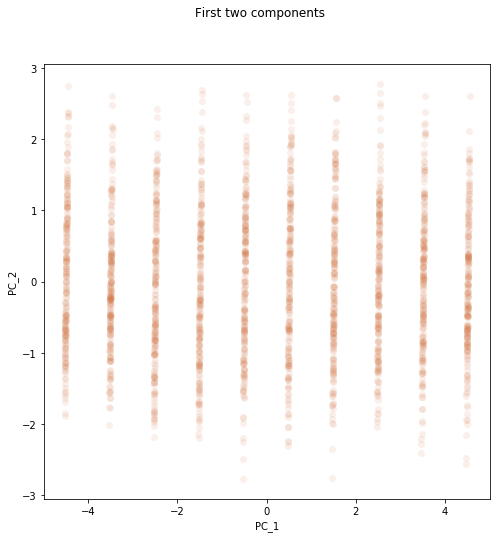

In [6]:

plt.figure(figsize=(8,8))
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(census_projected[:,0], census_projected[:,1], c = "#D06B36", s = 50, alpha = 0.1, linewidth=0)

When we plot the first two axes, we notice that there is a very dominant pattern. 

Such strong patterns are generally due to structured columns, such as categorical data, which dominate the PCA results. 

The eigenvalue decomposition favours these columns and they get high loadings within the PCs and thus a stronger representation. 

We then move on to look at the loadings and try to identify which column(s) are more represented.

In [7]:
# some strong patterns in PCA results, why is that?
# let's have a look at the component loadings to identify this

print( pca.components_)

[[ 9.99787595e-01 -3.63377468e-04  2.10472022e-03  6.59695636e-05
  -1.70550759e-04  6.36307653e-05 -1.91991039e-06 -8.20157285e-05
   2.83122416e-04 -4.82259203e-04 -3.76674615e-03 -2.20300625e-04
   4.94441812e-03  3.93218663e-03  3.15348779e-03  9.37857986e-04
   1.45767537e-03 -3.35306248e-03 -3.69666468e-03 -1.03888848e-03
   3.02502015e-03  2.57445724e-03  2.70110118e-03  6.40526867e-04
   1.29125215e-03 -1.82711864e-04  1.80017397e-03  1.38651611e-03
  -5.57558967e-04 -3.59389347e-03 -2.33521963e-03 -2.96704083e-03
   2.04538535e-03 -2.75902224e-03  3.80136203e-03 -2.72478437e-03
  -3.94718765e-04 -4.40347169e-03  2.17185258e-03 -1.80149804e-03
  -1.17450732e-03 -1.26784442e-03 -1.58505555e-03  1.52693553e-03
   2.65827298e-03  2.38523937e-03  3.81839031e-03  1.39209126e-03
   1.16055172e-03  5.05881681e-04 -2.52719613e-04 -1.02233964e-03
   1.58938732e-04 -2.65811057e-03 -1.76770090e-03 -1.60290297e-03
  -1.17825198e-03 -1.00803786e-03 -6.19798665e-04 -5.90472686e-04
  -1.45106

In [8]:
pc_1_loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names_filtered)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

Column " fold " has a loading of:  0.999787594941047
Column " pctUrban " has a loading of:  0.004944418123686737
Column " PctOccupManu " has a loading of:  -0.004403471688210289
Column " RentHighQ " has a loading of:  0.004077954036518593
Column " medIncome " has a loading of:  0.003932186626373454
Column " PctYoungKids2Par " has a loading of:  0.003818390313348545
Column " PctEmploy " has a loading of:  0.0038013620290404115
Column " agePct65up " has a loading of:  -0.00376674614866388
Column " pctWPubAsst " has a loading of:  -0.0036966646787692137
Column " PctPopUnderPov " has a loading of:  -0.003593893474030636


And we notice that the column called "fold" has a very high loading, almost 1. And this is a sign that we need to have a look at this column. When we look at the excel sheet, we can see that it is an artefact in the data (which was artificially added for cross-validation purposes). This is an important lesson that some of the patterns we notice might really relate to artefacts rather than "real" observations. We need to continue without this column:

In [9]:
#let's remove the second column

census_data_filtered = census_np[:,2::]
column_names_filtered = column_names[2::]
census_data_filtered

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2, 0.2],
       [0.0, 0.16, 0.12, ..., 0.12, 0.45, 0.67],
       [0.0, 0.42, 0.49, ..., 0.21, 0.02, 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 0.23],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 0.19],
       [0.2, 0.78, 0.14, ..., 0.3, 0.05, 0.48]], dtype=object)

In [10]:
# Build a model that will return two principal components
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(census_data_filtered)

# have a look at the components directly if we can notice any interesting structure
projected_census = pca.transform(census_data_filtered)

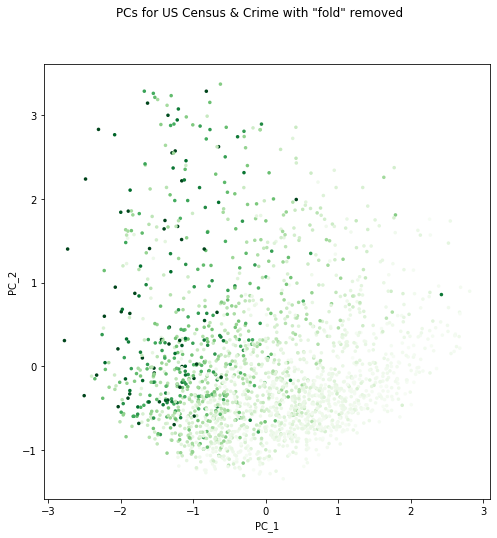

In [11]:
# as an additional task, we think it might be nice to see the crime volume as mapped to the color of the points
color_mapping_values_crime = np.asarray(census_data_filtered[:,-1], 'f')

# now on to drawing
plt.figure(figsize=(8,8))
plt.suptitle('PCs for US Census & Crime with "fold" removed')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projected_census[:,0], projected_census[:,1], 
            c = color_mapping_values_crime, cmap = plt.cm.Greens, 
            s = 50, linewidth=0, marker = '.')

In [12]:
# Here I say I would like to look at the first ten columns
number_columns_to_display = 10

print ("--- Firstly, the first component: ")
pc_1_loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:number_columns_to_display]
pc_1_names = np.asarray(column_names_filtered)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:number_columns_to_display]

for i in range(0, number_columns_to_display):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])


--- Firstly, the first component: 
Column " PctHousNoPhone " has a loading of:  -0.19795349471487855
Column " PctPopUnderPov " has a loading of:  -0.1906082465122194
Column " RentHighQ " has a loading of:  0.18842255453242998
Column " medIncome " has a loading of:  0.18582151190971338
Column " PctYoungKids2Par " has a loading of:  0.17880732603476088
Column " medFamInc " has a loading of:  0.1772832400998145
Column " pctWPubAsst " has a loading of:  -0.17368929512796066
Column " PctKids2Par " has a loading of:  0.16953338505297896
Column " PctFam2Par " has a loading of:  0.1632766058994414
Column " RentLowQ " has a loading of:  0.16311975758569724


In [13]:
print ("--- Secondly, the second component: ")
pc_2_loadings = np.asarray(pca.components_[1])[np.argsort( np.abs(pca.components_[1]))[::-1]][0:number_columns_to_display]
pc_2_names = np.asarray(column_names_filtered)[np.argsort( np.abs(pca.components_[1]))[::-1]][0:number_columns_to_display]

for i in range(0, number_columns_to_display):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

--- Secondly, the second component: 
Column " PctRecImmig8 " has a loading of:  0.25506437126283005
Column " PctRecImmig10 " has a loading of:  0.2534755140215139
Column " PctRecImmig5 " has a loading of:  0.25246297271567025
Column " PctRecentImmig " has a loading of:  0.24823940512436415
Column " PctForeignBorn " has a loading of:  0.24178344265158397
Column " PctSpeakEnglOnly " has a loading of:  -0.2153151034457683
Column " PctNotSpeakEnglWell " has a loading of:  0.2075749938005313
Column " racePctHisp " has a loading of:  0.1878260265626712
Column " PctPersDenseHous " has a loading of:  0.18470434894126958
Column " pctUrban " has a loading of:  0.1833168294248523


When these are observed, we notice that the first component relates to income related columns, whereas the second one relates more to immigration related columns. If you look at the colours (saturated means higher volumes of crime), you notice that the first "factor" is negatively related to crime volumes ( i.e., higher income regions mean lower crime levels) while the second is positively correlated. You even spot some outliers (the one to the top right) with exceptionally high crime. It would be interesting to look at this outlier and try to understand the reasons why. But we stop here in this exercise, but you feel free to work on this further. (You might notice that such tasks are those where an interactive system might save you lots of time.)


At this stage, you might want to look at more components, 3 or 4 and look for some other factors. What we do is to dig deeper within the first component and see whether we can find any inter relations between the 10 income related columns listed above. Notice that we are now reducing a 10-dimensional data set.


In [14]:
# a local analysis
    
columns_selected = np.argsort( np.abs(pca.components_[0]))[::-1][0:number_columns_to_display]
column_names_selected = column_names_filtered[columns_selected]
census_data_selected = census_data_filtered[:,columns_selected]

In [15]:
# Build a model that will return two principal components
pca_selected = PCA(n_components=2)

# We first fit a PCA model to the data
pca_selected.fit(census_data_selected)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

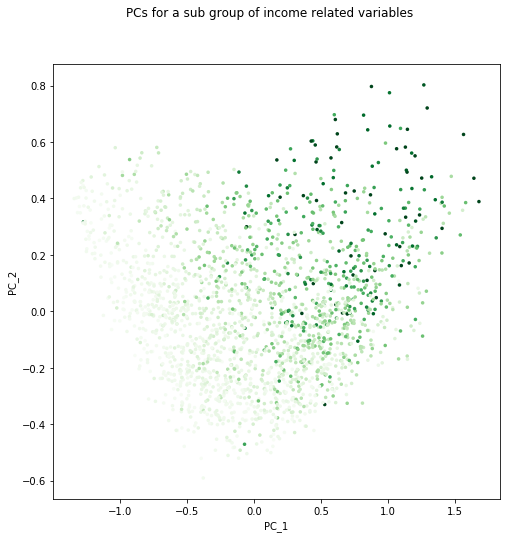

In [16]:
projected_census_selected = pca_selected.transform(census_data_selected)

plt.figure(figsize=(8,8))
plt.suptitle('PCs for a sub group of income related variables')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projected_census_selected[:,0], projected_census_selected[:,1], 
            c = color_mapping_values_crime, cmap = plt.cm.Greens, s = 50, marker='.',linewidth=0)

In [17]:
print ("--- Firstly, the first component: ")
pc_1_loadings = np.asarray(pca_selected.components_[0])[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:number_columns_to_display]
pc_1_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:number_columns_to_display]

for i in range(0, number_columns_to_display):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

--- Firstly, the first component: 
Column " PctHousNoPhone " has a loading of:  0.35087093515570617
Column " PctPopUnderPov " has a loading of:  0.3393631229515498
Column " RentHighQ " has a loading of:  -0.33791797368067844
Column " medIncome " has a loading of:  -0.3211847465136156
Column " PctYoungKids2Par " has a loading of:  -0.32042611703637747
Column " medFamInc " has a loading of:  -0.30174665698653724
Column " pctWPubAsst " has a loading of:  0.3011866795570416
Column " RentLowQ " has a loading of:  -0.2970043608478013
Column " PctKids2Par " has a loading of:  -0.29677395612379087
Column " PctFam2Par " has a loading of:  -0.28922366862676796


In [18]:
print ("--- Secondly, the second component: ")
pc_2_loadings = np.asarray(pca_selected.components_[1])[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:number_columns_to_display]
pc_2_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:number_columns_to_display]

for i in range(0, number_columns_to_display):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

--- Secondly, the second component: 
Column " RentHighQ " has a loading of:  0.5475499894201789
Column " RentLowQ " has a loading of:  0.4489932483491029
Column " PctKids2Par " has a loading of:  -0.35951601369843506
Column " PctFam2Par " has a loading of:  -0.3324476936556092
Column " PctYoungKids2Par " has a loading of:  -0.3153104197887722
Column " pctWPubAsst " has a loading of:  0.2900287324957893
Column " medIncome " has a loading of:  0.1875621882964315
Column " medFamInc " has a loading of:  0.17124371143622114
Column " PctPopUnderPov " has a loading of:  0.10318257761272281
Column " PctHousNoPhone " has a loading of:  0.011527570951666255


We now starting to notice the differences between the columns and it is much more easier to interpret the loadings. In areas with high crime volume, we notice that are more houses with no phone and median income has a negative correlation. Another observation from the plot is that now the first PC has a stronger correlation with crime volume.

# Exercicse 2: Multidimensional Scaling

Our task is to compute the MDS projection and discover some relations within the boroughs in London. (Here,some of you might run into encoding issues when loading csv or Excel files, here is a related discussion to deal with that.). We start by loading the [excel sheet](http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/Week05/london-borough-profilesV2.xlsx) (and remove the first meta-data row to make our life even easier).


In [19]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import manifold
from sklearn.metrics import euclidean_distances

londonBorough = pd.read_excel('data/london-borough-profilesV2.xlsx')

# since the data is problematic and the missing values were 
# represented with all sorts of strange characters, we can do some tricks
# and try to force everything to be converted into numeric arrays
# this will find the suitable data type and get the problematic values filled with NAN

# keep place names and store them in a 
placeNames = londonBorough["Area/INDICATOR"]


londonBorough = londonBorough.apply(pd.to_numeric, errors='coerce')

# and let's get only the numeric columns
numericColumns = londonBorough.apply(pd.to_numeric, errors='ignore')



# let's fill the missing values with mean()
numericColumns = numericColumns.fillna(numericColumns.mean())

# let's centralize the data
numericColumns -= numericColumns.mean()

numericColumns=numericColumns.dropna(axis = 1)

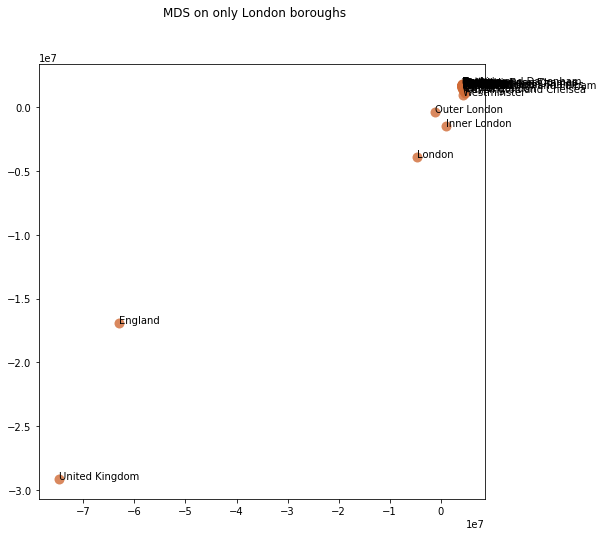

In [20]:
# now we compute the euclidean distances between the columns by passing the same data twice
# the resulting data matrix now has the pairwise distances between the boroughs.
# CAUTION: note that we are now building a distance matrix in a high-dimensional data space
# remember the Curse of Dimensionality -- we need to be cautious with the distance values
distMatrix = euclidean_distances(numericColumns, numericColumns)

# for instance, typing distMatrix.shape on the console gives:
# Out[115]: (38, 38) # i.e., the number of rows

# first we generate an MDS object which returns
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y = mds.fit_transform(distMatrix)


plt.figure(figsize=(8,8))
plt.suptitle('MDS on only London boroughs')
plt.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth='0')

for i, txt in enumerate(placeNames):
    plt.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))
    
plt.show()

Notice that, we are having an issue here. The rows which are not London boroughs but rather included as avareges in the data (e.g., for UK, England) make the plot highly skewed. It's a good idea to remove them and continue the analysis with only data on the boroughs. 

We take the easy way and make a [filtered excel](http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/Week05/london-borough-profilesV3.xlsx) sheet and run the analysis once again, which yields:




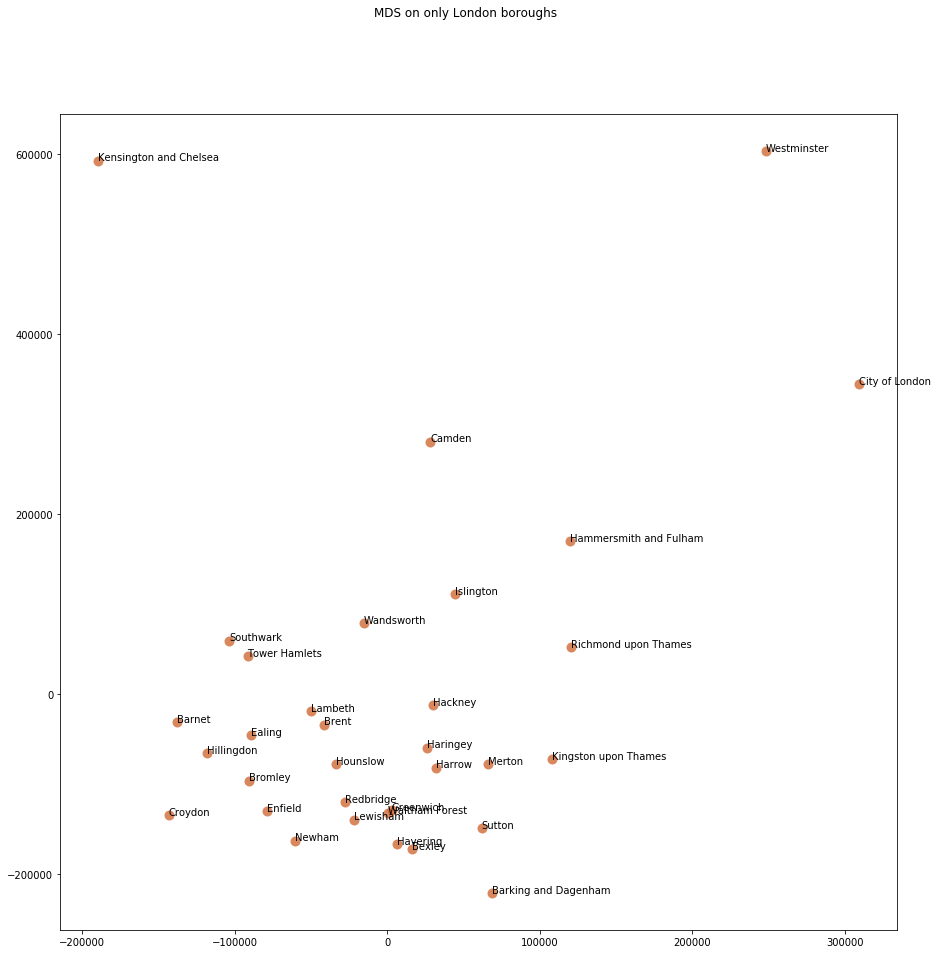

In [21]:
londonBorough = pd.read_excel('data/london-borough-profilesV3.xlsx')
# keep place names and store them in a 
placeNames = londonBorough["Area/INDICATOR"]


londonBorough = londonBorough.apply(pd.to_numeric, errors='coerce')

# and let's get only the numeric columns
numericColumns = londonBorough.apply(pd.to_numeric, errors='ignore')



# let's fill the missing values with mean()
numericColumns = numericColumns.fillna(numericColumns.mean())

# let's centralize the data
numericColumns -= numericColumns.mean()

numericColumns=numericColumns.dropna(axis = 1)

distMatrix = euclidean_distances(numericColumns, numericColumns)

mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y = mds.fit_transform(distMatrix)


plt.figure(figsize=(15,15))
plt.suptitle('MDS on only London boroughs')
plt.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth='0')

for i, txt in enumerate(placeNames):
    plt.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))
    
plt.show()

Now we see more structure, however the interpretation depends on how we defined the distance function. There is no actual meaning on the axes in MDS and the locations are arbitrary -- so the interpretation depends solely on the distance metric. You might even notice that each time when you run the code, you get a different layout (due to the iterative nature of the computation algorithm in scikit-learn). Since the distance metric is very high-dimensional here, it is not easy to interpret the plot. So we decide to make a more meaningful distance function by limiting our interest to those columns that relate to feelings and emotions of residents.

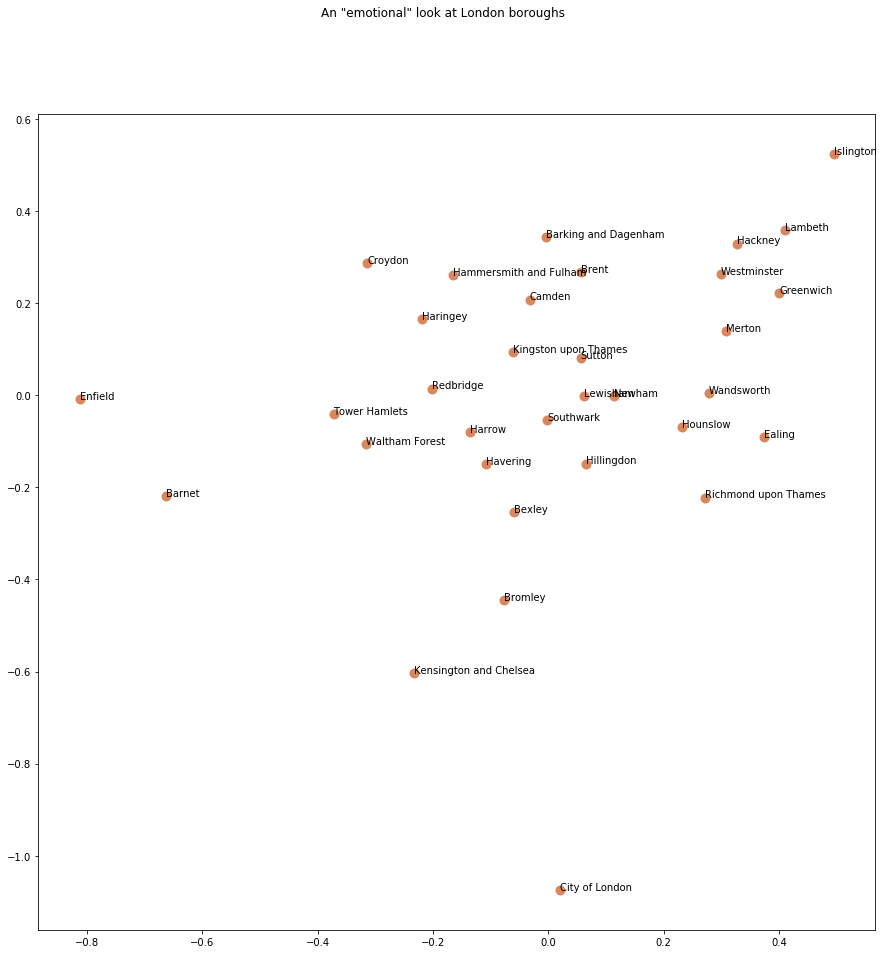

In [22]:
# get the data columns relating to emotions and feelings
dataOnEmotions = numericColumns[["Life satisfaction score 2012-13 (out of 10)", "Worthwhileness score 2012-13 (out of 10)","Happiness score 2012-13 (out of 10)","Anxiety score 2012-13 (out of 10)"]]


# a new distance matrix to represent "emotional distance"s
distMatrix2 = euclidean_distances(dataOnEmotions, dataOnEmotions)

# compute a new "embedding" (machine learners' word for projection)
Y2 = mds.fit_transform(distMatrix2)

plt.figure(figsize=(15,15))
plt.suptitle('An \"emotional\" look at London boroughs')
plt.scatter(Y2[:, 0], Y2[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth='0')

for i, txt in enumerate(placeNames):
    plt.annotate(txt, (Y2[:, 0][i],Y2[:, 1][i]))
    
plt.show()


Things are much more easier now since there is a meaning in distance and proximity. We can see that Enfield and Barnet are "emotionally different". 
To understand what makes them different than the others is an interesting question and you may need to look at the individual columns to find out.

Bur for now, have a look at this interesting visualisation from a [very recent book](http://theinformationcapital.com/project/islington-has-issues/) (where we also have a contribution from giCentre) that represents similar data. 
Notice that we also have Islington as a separate point on our plot as also signalled in the article, and have a look at Hackney, Westminster, and Lambeth - three boroughs with a not so positive image.